<a href="https://colab.research.google.com/github/adong-hood/dm-24/blob/main/module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Data Preprocessing

The following tutorial contains Python examples for data preprocessing. You should refer to the "Data" chapter of the "Introduction to Data Mining" book (slides are available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial4/tutorial4.ipynb.

Data preprocessing consists of a broad set of techniques for cleaning, selecting, and transforming data to improve data mining analysis. Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

## 4.1 Data Quality Issues

Poor data quality can have an adverse effect on data mining. Among the common data quality issues include noise, outliers, missing values, and duplicate data. This section presents examples of Python code to alleviate some of these data quality problems. We begin with an example dataset from the UCI machine learning repository containing information about breast cancer patients. We will first download the dataset using Pandas read_csv() function and display its first 5 data points.

**<font color="red">Code:</font>**

In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### 4.1.1 Missing Values

It is not unusual for an object to be missing one or more attribute values. In some cases, the information was not collected; while in other cases, some attributes are inapplicable to the data instances. This section presents examples on the different approaches for handling missing values.

According to the description of the data (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original), the missing values are encoded as '?' in the original data. Our first task is to convert the missing values to NaNs. We can then count the number of missing values in each column of the data.

**<font color="red">Code:</font>**

In [ ]:
import numpy as np

data = data.replace('?',np.nan)

print('Number of missing values by column:')
print(data.isna().sum())

print("\nTotal number of missing values = %d" % (data.isna().sum().sum()))

print('\nNumber of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

Number of missing values by column:
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Total number of missing values = 16

Number of instances = 699
Number of attributes = 10


Observe that only the 'Bare Nuclei' column contains missing values. In the following example, the missing values in the 'Bare Nuclei' column are replaced by the median value of that column. The values before and after replacement are shown for a subset of the data points.

**<font color="red">Code:</font>**

In [ ]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])

# Convert the column to numeric, coercing errors to NaN
data2 = pd.to_numeric(data2, errors='coerce')

#fill in Na with median
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20     10
21      7
22      1
23    NaN
24      1
Name: Bare Nuclei, dtype: object

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


Instead of replacing the missing values, another common approach is to discard the data points that contain missing values. This can be easily accomplished by applying the dropna() function to the data frame.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows in original data = %d' % (data.shape[0]))

data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


### 4.1.2 Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. In the example code below, we will draw a boxplot to identify the columns in the table that contain outliers. Note that the values in all columns (except for 'Bare Nuclei') are originally stored as 'int64' whereas the values in the 'Bare Nuclei' column are stored as string objects (since the column initially contains strings such as '?' for representing missing values). Thus, we must  convert the column into numeric values first before creating the boxplot. Otherwise, the column will not be displayed when drawing the boxplot.

**<font color="red">Code:</font>**

<Axes: >

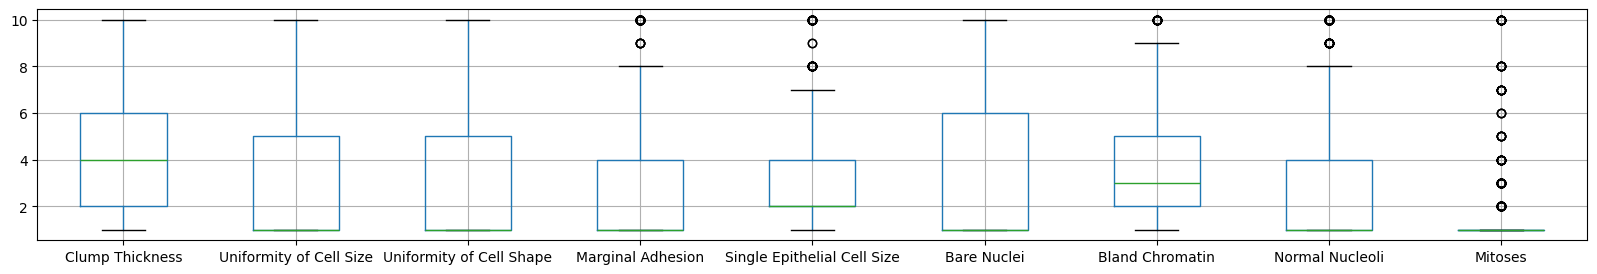

In [ ]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

The boxplots suggest that only 5 of the columns (Marginal Adhesion, Single Epithetial Cell Size, Bland Cromatin, Normal Nucleoli, and Mitoses) contain abnormally high values. To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

**<font color="red">Code:</font>**

The following code shows the results of standardizing the columns of the data. Note that missing values (NaN) are not affected by the standardization process.

In [ ]:

Z = (data2-data2.mean())/data2.std()
Z[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


**<font color="red">Code:</font>**

The following code shows the results of discarding rows with Z > 3 or Z <= -3.

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))
#Z.fillna(Z.median(),inplace=True)
Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


In [ ]:
# step-by-step explanation
Z[((Z > -3).sum(axis=1) == 9)].shape[0]
Z[((Z > -3).sum(axis=1) == 9) & ((Z <= 3).sum(axis=1) == 9)].shape[0]

632

### 4.1.3 Duplicate Data

Some datasets, especially those obtained by merging multiple data sources, may contain duplicates or near duplicate instances. The term deduplication is often used to refer to the process of dealing with duplicate data issues.

**<font color="red">Code:</font>**

In the following example, we first check for duplicate instances in the breast cancer dataset.

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


The duplicated() function will return a Boolean array that indicates whether each row is a duplicate of a previous row in the table. The results suggest there are 236 duplicate rows in the breast cancer dataset. For example, the instance with row index 11 has identical attribute values as the instance with row index 28. Although such duplicate rows may correspond to samples for different individuals, in this hypothetical example, we assume that the duplicates are samples taken from the same individual and illustrate below how to remove the duplicated rows.

**<font color="red">Code:</font>**

In [ ]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4.2 Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

In the example below, we will use the daily precipitation time series data for a weather station located at Detroit Metro Airport. The raw data was obtained from the Climate Data Online website (https://www.ncdc.noaa.gov/cdo-web/). The daily precipitation time series will be compared against its monthly values.

**<font color="red">Code:</font>**

The code below will load the precipitation time series data and draw a line plot of its daily time series.

In [ ]:
daily = pd.read_csv('/content/drive/MyDrive/datamining/DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/datamining/DTW_prec.csv'

In [ ]:
daily.head()

Observe that the daily time series appear to be quite chaotic and varies significantly from one time step to another. The time series can be grouped and aggregated by month to obtain the total monthly precipitation values. The resulting time series appears to vary more smoothly compared to the daily time series.

**<font color="red">Code:</font>**

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

In the example below, the daily precipitation time series are grouped and aggregated by year to obtain the annual precipitation values.

**<font color="red">Code:</font>**

In [ ]:
annual = daily.groupby(pd.Grouper(freq='Y')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

## 4.3 Sampling

Sampling is an approach commonly used to facilitate (1) data reduction for exploratory data analysis and scaling up algorithms to big data applications and (2) quantifying uncertainties due to varying data distributions. There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In the example below, we will apply sampling with replacement and without replacement to the breast cancer dataset obtained from the UCI machine learning repository.

**<font color="red">Code:</font>**

We initially display the first five records of the table.

In [ ]:
data.head()

In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(n=3)
sample

In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, random_state=1)
sample

Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

**<font color="red">Code:</font>**

In [ ]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

## 4.4 Discretization

Discretization is a data preprocessing step that is often used to transform a continuous-valued attribute to a categorical attribute. The example below illustrates two simple but widely-used unsupervised discretization methods (equal width and equal depth) applied to the 'Clump Thickness' attribute of the breast cancer dataset.

First, we plot a histogram that shows the distribution of the attribute values. The value_counts() function can also be applied to count the frequency of each attribute value.

**<font color="red">Code:</font>**

In [ ]:
data['Clump Thickness'].unique()

In [ ]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

For the equal width method, we can apply the cut() function to discretize the attribute into 4 bins of similar interval widths. The value_counts() function can be used to determine the number of instances in each bin.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

For the equal frequency method, the qcut() function can be used to partition the values into 4 bins such that each bin has nearly the same number of instances.

**<font color="red">Code:</font>**

In [ ]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

## 4.5 Summary

This tutorial presents Python programming examples for data preprocessing, including data cleaning (to handle missing values and remove outliers as well as duplicate data), aggregation, sampling, discretization, and dimensionality reduction using principal component analysis.   

**<font color='blue'>References:</font>**

1. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

2. Mangasarian, O.L. and Wolberg, W. H. (1990). "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, pp 1 & 18.

3. Wolberg, W.H. and Mangasarian, O.L. (1990). "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, pp 9193-9196.

4. Climate Data Online [https://www.ncdc.noaa.gov/cdo-web/].

## Homework 3 ##

**This homework is mainly for you to learn. You may work in a group of 2. The answer to each problem should be at least 80 words.<br> <font color="red"> Your Homework 3 submission should only include content from this point on. pdf, not ipynb.<br>
Use your own words, as using AI for your homework is not allowed and strongly discouraged. </font>**

### Q-1: K-Nearest Neighbors (KNN)
Question: What are the key factors that influence the performance of the K-Nearest Neighbors (KNN) algorithm? How do you choose the value of 'K', and what is the effect of different distance metrics on classification accuracy?

there are a number of different  factors affect KNN performance . The choice of distance metric is important because KNN is highly sensitive to feature magnitudes and scales, which can skew results if features aren't properly normalized before training. The value of K determines how many neighbors influence predictions. Smaller K values can lead to overfitting and noise sensitivity, while larger K values may cause underfitting. Data dimensionality also matters since KNN suffers from the curse of dimensionality in high-dimensional spaces.

We choose the optimal K value using cross-validation techniques. This involves testing different K values systematically and evaluating performance metrics like accuracy or error rates. We plot these metrics against various K values to identify the point where performance stabilizes or begins to decline, similar to finding an elbow in the curve.

Different distance metrics will also affect classification accuracy by changing how similarity between data points is measured. Euclidean distance works well for continuous features with similar scales, Manhattan distance is more robust to outliers and works better in high dimensions, while Hamming distance is specifically designed for categorical data. The choice depends on your data's  distribution patterns.


### Q-2: Naive Bayes
Question: Why is Naive Bayes considered a "naive" classifier, and how does it make predictions? What are the implications of the naive independence assumption in real-world applications?

Naive Bayes is considered "naive" because it makes a strong assumption that all features are conditionally independent given the class label. This means it assumes that the  value of one feature has no effect on any other feature when determining the class. While this assumption is not commonly true in real-world data, it allows for simplified mathematical calculations and makes the algorithm computationally efficient.

The algorithm makes predictions by applying Bayes theorem to calculate probabilities. It multiplies the prior probability of each class by the likelihood of observing each feature value, then normalizes these products to get final probabilities. The class with the highest posterior probability becomes the predicted outcome.

The naive independence assumption has issues in real-world applications. It can decrease accuracy when features are strongly correlated, such as age and income in demographic data, or word co-occurrences in text analysis. Although, despite violating this assumption, Naive Bayes often performs surprisingly well in practice, especially for text classification and spam filtering.


### Q-3: Support Vector Machines (SVM)
Question: Explain how Support Vector Machines (SVM) work in separating classes of data. What role do the kernel functions play, and how would you select a kernel function for a given dataset?

SVMs work by finding an optimal hyperplane that separates different classes of data points while maximizing the margin between them. The margin is the distance between the hyperplane and the closest data points from each class, called support vectors. This margin maximization helps ensure good generalization to unseen data by creating the most robust decision boundary possible in the feature space.

Kernel functions are important  when data is not linearly separable in its original feature space. They enable the "kernel trick," which allows SVMs to implicitly map data into higher dimensional spaces where linear separation becomes possible, without explicitly calculating coordinates in this higher space. Common kernels include linear polynomial, RBF (Gaussian), and sigmoid functions

Selecting an appropriate kernel function depends on data characteristics. Use linear kernels for linearly separable data or when you have many features relative to samples. RBF kernels work well for complex, non-linear patterns and smaller datasets. Consider computational cost, as linear kernels are faster for large datasets.


### Q-4: Logistic Regression
Question: How does logistic regression differ from linear regression, and why is it better suited for binary classification tasks? Explain the concept of maximum likelihood estimation (MLE) in logistic regression.

Logistic regression differs from linear regression in a feww key ways. While linear regression predicts continuous values that can range from negative to positive infinity, logistic regression uses a sigmoid function to constrain outputs between 0 and 1, making it useful for probability estimation. Linear regression assumes a linear relationship between features and the target variable, while logistic regression models the log-odds of the probability.

Logistic regression is better suited for binary classification because it naturally outputs probabilities that can be directly interpreted as the likelihood of belonging to a particular class. The sigmoid function ensures these probabilities are meaningful and bounded, and they can be easily converted to binary predictions using a threshold value typically 0.5.
Maximum likelihood estimation (MLE) in logistic regression works by finding parameter values that maximize the likelihood of observing the given training data.

Unlike linear regression which uses least squares optimization, logistic regression uses MLE because we're dealing with probabilities rather than continuous values. The algorithm iteratively adjusts the coefficients using optimization techniques like gradient descent to maximize the probability of correctly predicting the observed outcomes in the training dataset.


### Q-5: Data Preprocessing
This question is related to data precessing techniques introduced in this notebook. Summarize something new you learned from this noteook.

After exploring the notebook , I learned about discretization, which is the process of converting continuous numerical values into discrete categories or bins. While I had known about this technique conceptually, seeing its practical implementation was particularly valuable. The notebook demonstrated how discretization can help reduce the impact of outliers and make continuous variables more suitable for certain algorithms that work better with categorical data.

Additionally, it was interesting to get a comprehensive refresher on dealing with outliers by computing z-scores and visualizing these values within our larger dataset. The visual approach to identifying outliers through various plotting techniques helped me understand how statistical measures translate to real patterns in the data, making outlier detection much more intuitive and interpretable for practical applications.